**FINAL PROJECT**

521H0238_Lê Quang Huy


1)	 **Phân tích thống kê trên dữ liệu,
vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu.
Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
# read csv file
forest_fires_data = pd.read_csv('forestfires.csv')

In [30]:
forest_fires_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [31]:
forest_fires_data.info()
# Descriptive statistical analysis
statistical_summary = forest_fires_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [9]:
# check missing values
missing_values = forest_fires_data.isnull().sum()

In [10]:
print("Total number of values:", forest_fires_data.size)

Total number of values: 6721


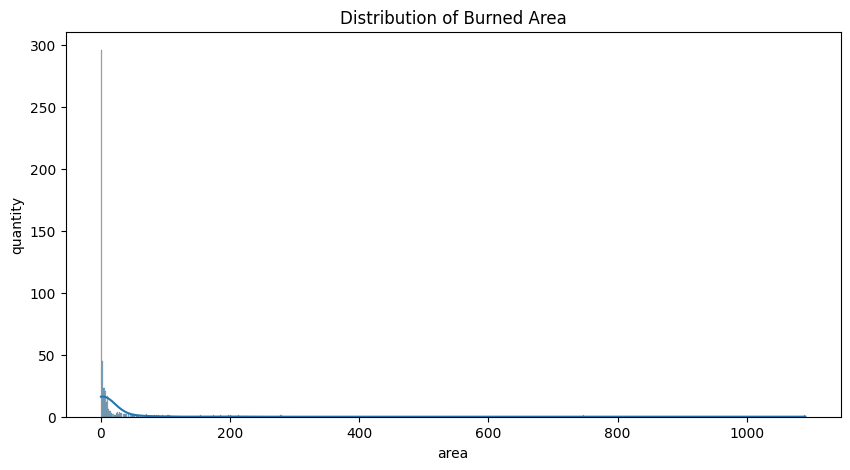

In [11]:
# Phân phối của diện tích bị cháy (biến 'area')
plt.figure(figsize=(10, 5))
sns.histplot(forest_fires_data['area'], kde=True)
plt.title('Distribution of Burned Area')
plt.xlabel('area')
plt.ylabel('quantity')
plt.show()

<ipython-input-12-3f811e6731df>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forest_fires_data.corr(), annot=True, cmap='coolwarm')


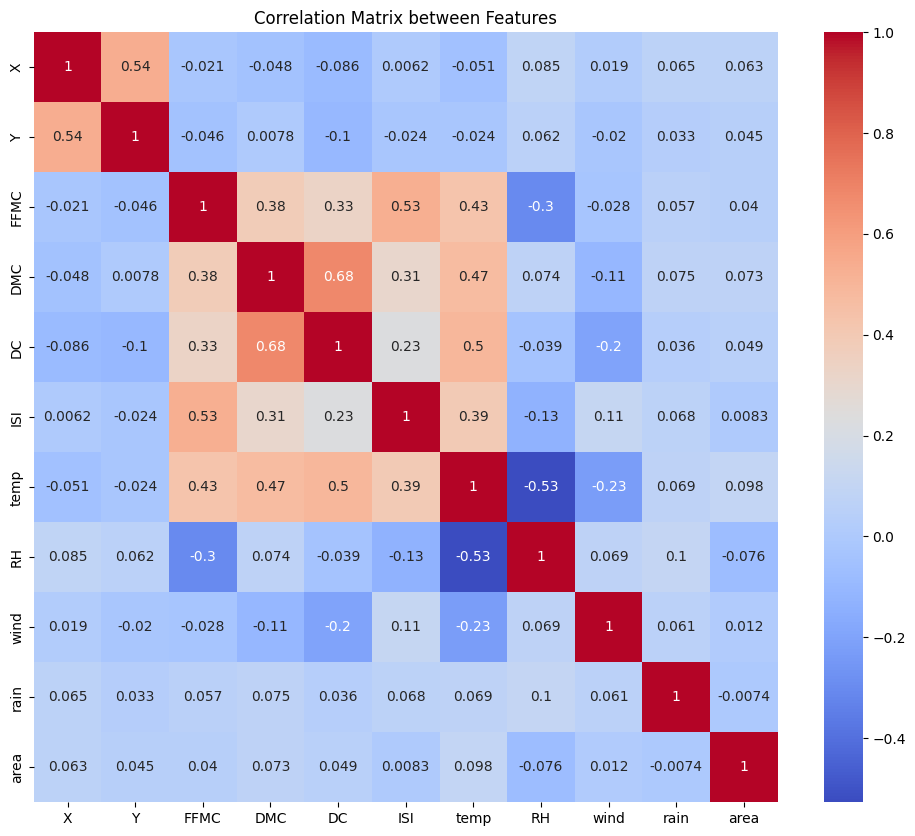

In [12]:
# Correlation chart between quantitative characteristics
plt.figure(figsize=(12, 10))
sns.heatmap(forest_fires_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Features')
plt.show()

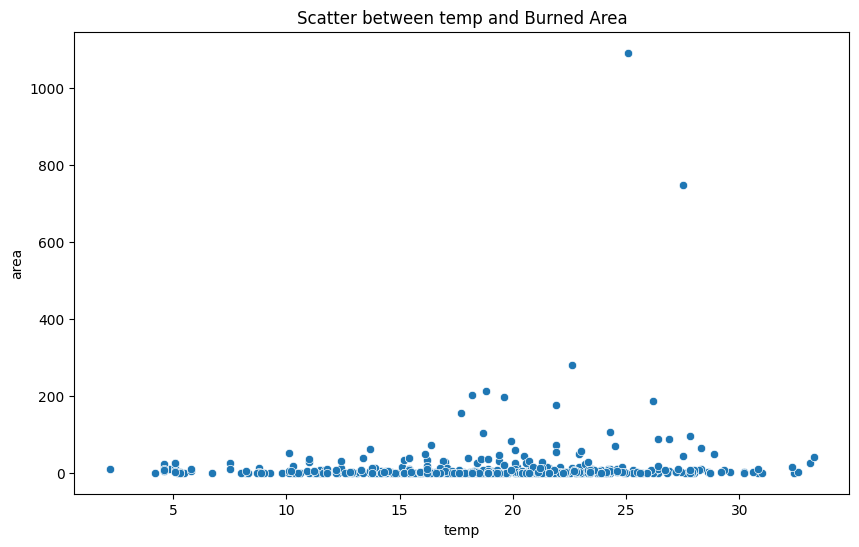

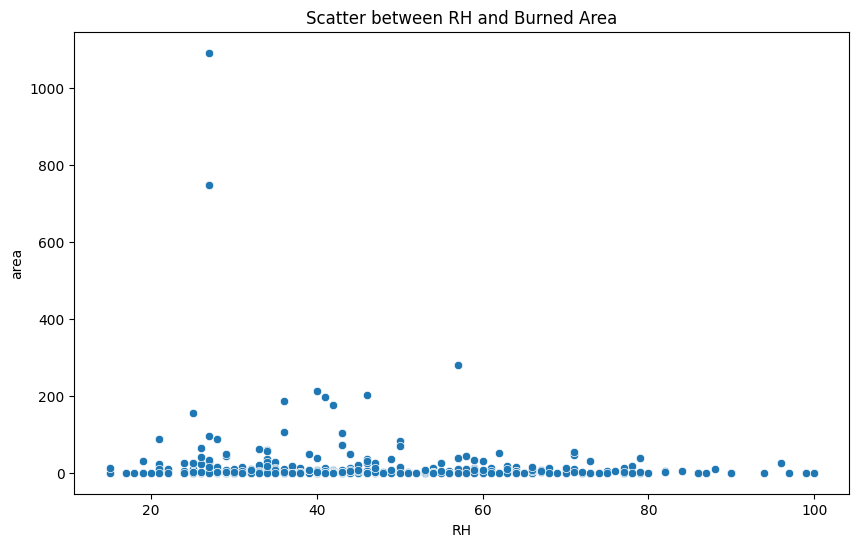

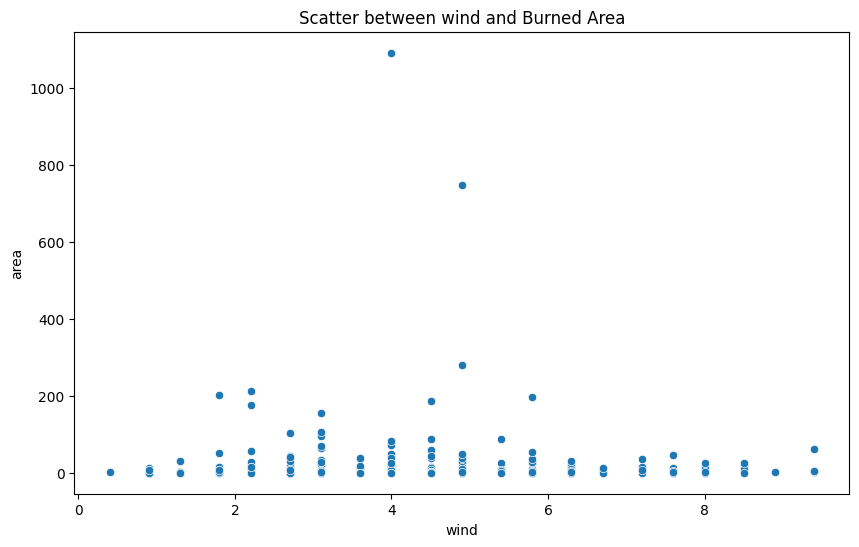

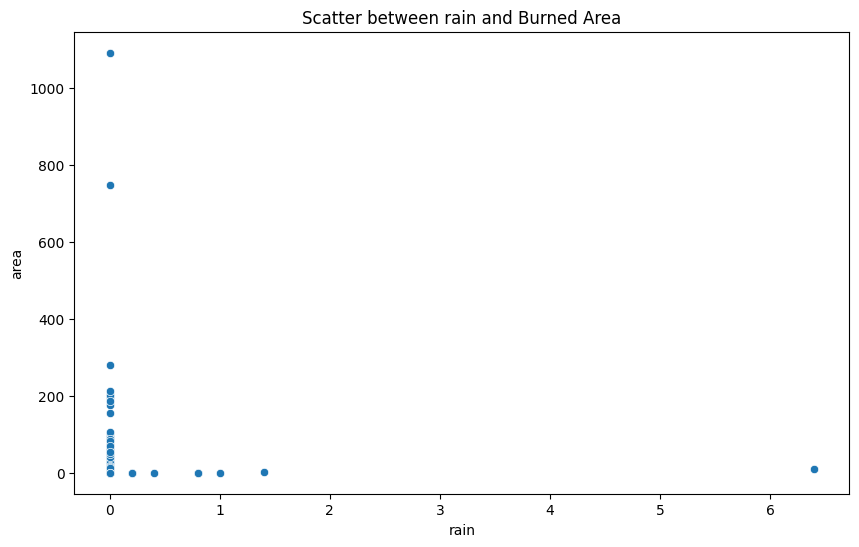

In [13]:
# A scatter plot between burned area and some main characteristics
features = ['temp', 'RH', 'wind', 'rain']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=forest_fires_data[feature], y=forest_fires_data['area'])
    plt.title(f'Scatter between {feature} and Burned Area')
    plt.xlabel(feature)
    plt.ylabel('area')
    plt.show()

**2)	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
# Prepare data
# Convert categorical columns to numbers
categorical_features = ['month', 'day']
numerical_features = forest_fires_data.drop(['area', 'month', 'day'], axis=1).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [16]:
# Divide the data into training and testing sets
X = forest_fires_data.drop('area', axis=1)
y = forest_fires_data['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(413, 12)
(413,)
(104, 12)
(104,)


In [18]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
}

In [19]:
# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} MSE: {mse}')

Linear Regression MSE: 11613.674532130444
Random Forest MSE: 11743.503704638211
Gradient Boosting MSE: 12208.42507871087


**3)	Sử dụng Feed Forward Neural Network**

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection

In [42]:
# Preprocessing for categorical columns
categorical_features = ['month', 'day']  # List of taxonomy columns
one_hot = OneHotEncoder()

In [43]:
# Prepare data
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot, categorical_features)
    ],
    remainder='passthrough'  # The remaining numeric columns remain unchanged
)

In [44]:
X_processed = preprocessor.fit_transform(forest_fires_data.drop('area', axis=1))
y = forest_fires_data['area']

# Initialize MinMaxScaler
nn_scaler = MinMaxScaler()

# Fit and transform the processed data
X_scaled = nn_scaler.fit_transform(X_processed)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Transform X_train and X_test
X_train_scaled = nn_scaler.transform(X_train.astype(np.float))
X_test_scaled = nn_scaler.transform(X_test.astype(np.float))

<ipython-input-44-68696d0dc614>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_scaled = nn_scaler.transform(X_train.astype(np.float))
<ipython-input-44-68696d0dc614>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_scaled = nn_scaler.transform(X_test.astype(np.float))


In [48]:
# Build the FFNN model
ffnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [49]:
ffnn_model.compile(optimizer='adam', loss='mean_squared_error')
history = ffnn_model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, sample_weight=np.ones(len(y_train)))

Epoch 1/150
13/13 [==============================] - 1s 6ms/step - loss: 2200.1897
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 2194.2119
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 2186.7168
Epoch 4/150
13/13 [==============================] - 0s 3ms/step - loss: 2176.6184
Epoch 5/150
13/13 [==============================] - 0s 4ms/step - loss: 2162.8545
Epoch 6/150
13/13 [==============================] - 0s 8ms/step - loss: 2146.1499
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 2128.2029
Epoch 8/150
13/13 [==============================] - 0s 5ms/step - loss: 2108.6965
Epoch 9/150
13/13 [==============================] - 0s 6ms/step - loss: 2099.5933
Epoch 10/150
13/13 [==============================] - 0s 8ms/step - loss: 2086.3633
Epoch 11/150
13/13 [==============================] - 0s 8ms/step - loss: 2080.7029
Epoch 12/150
13/13 [==============================] - 0s 6ms/step - loss: 2075.4915
E

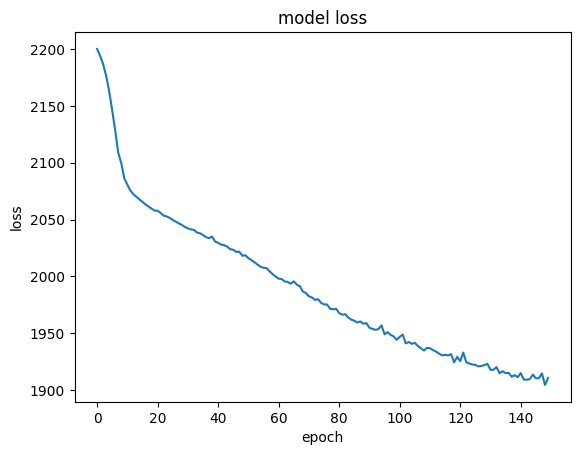

In [51]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Tránh Overfiting trên FFNN bằng dropout**


In [55]:
from tensorflow.keras.layers import Dropout

ffnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),  # Dropout layer
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer
    Dense(1, activation='linear')
])
ffnn_model.compile(optimizer='adam', loss='mean_squared_error')
history1=ffnn_model.fit(X_train_scaled, y_train, epochs=150, batch_size=32)

Epoch 1/150
13/13 [==============================] - 2s 6ms/step - loss: 2201.6763
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 2197.1438
Epoch 3/150
13/13 [==============================] - 0s 7ms/step - loss: 2191.7549
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 2184.9895
Epoch 5/150
13/13 [==============================] - 0s 4ms/step - loss: 2176.5730
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 2178.7009
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 2167.1628
Epoch 8/150
13/13 [==============================] - 0s 4ms/step - loss: 2155.8267
Epoch 9/150
13/13 [==============================] - 0s 6ms/step - loss: 2145.9116
Epoch 10/150
13/13 [==============================] - 0s 5ms/step - loss: 2138.1809
Epoch 11/150
13/13 [==============================] - 0s 6ms/step - loss: 2126.2546
Epoch 12/150
13/13 [==============================] - 0s 5ms/step - loss: 2116.8494
E

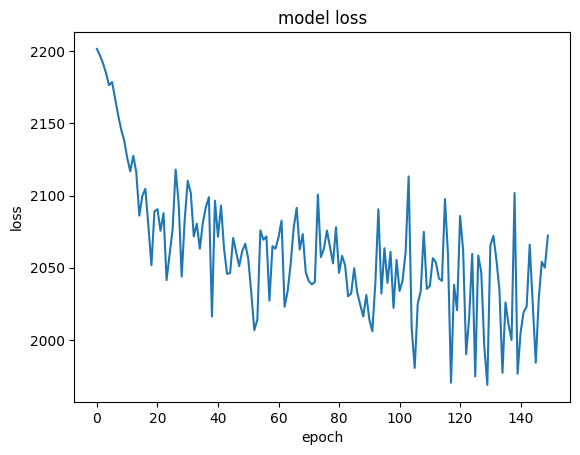

In [57]:
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**3)	Sử dụng Reccurent Neural Network**

In [58]:
from tensorflow.keras.layers import SimpleRNN
# Prepare data for RNN (need to reshape data)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

In [59]:
# Build an RNN model
rnn_model = Sequential([
    SimpleRNN(50, input_shape=(1, X_train_scaled.shape[1]), activation='relu'),
    Dense(1, activation='linear')
])

In [62]:
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
history2=rnn_model.fit(X_train_rnn, y_train, epochs=150, batch_size=32)

Epoch 1/150
13/13 [==============================] - 1s 2ms/step - loss: 2025.9238
Epoch 2/150
13/13 [==============================] - 0s 2ms/step - loss: 2024.7197
Epoch 3/150
13/13 [==============================] - 0s 3ms/step - loss: 2024.2047
Epoch 4/150
13/13 [==============================] - 0s 2ms/step - loss: 2023.9695
Epoch 5/150
13/13 [==============================] - 0s 3ms/step - loss: 2023.7821
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 2023.4491
Epoch 7/150
13/13 [==============================] - 0s 2ms/step - loss: 2023.4178
Epoch 8/150
13/13 [==============================] - 0s 2ms/step - loss: 2022.8944
Epoch 9/150
13/13 [==============================] - 0s 3ms/step - loss: 2022.8458
Epoch 10/150
13/13 [==============================] - 0s 2ms/step - loss: 2021.9448
Epoch 11/150
13/13 [==============================] - 0s 2ms/step - loss: 2021.8351
Epoch 12/150
13/13 [==============================] - 0s 2ms/step - loss: 2021.4388
E

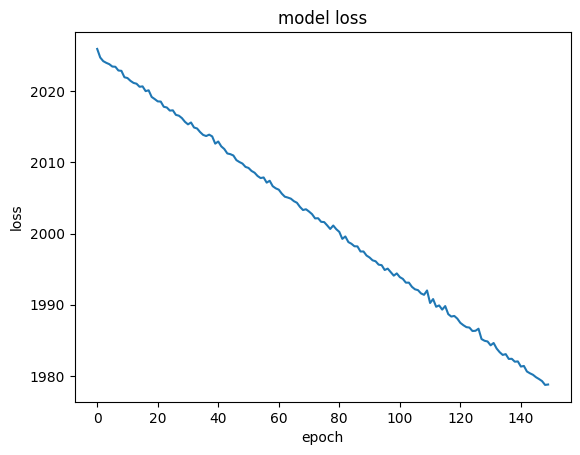

In [63]:
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Tránh Overfiting trên RNN bằng Early Stopping**


In [64]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

rnn_model = Sequential([
    SimpleRNN(50, input_shape=(1, X_train_scaled.shape[1]), activation='relu'),
    Dense(1, activation='linear')
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
history3=rnn_model.fit(X_train_rnn, y_train, epochs=150, batch_size=32,
              validation_split=0.2, callbacks=[early_stopping])

Epoch 1/150
11/11 [==============================] - 1s 32ms/step - loss: 2595.3904 - val_loss: 629.1340
Epoch 2/150
11/11 [==============================] - 0s 5ms/step - loss: 2591.2705 - val_loss: 626.9530
Epoch 3/150
11/11 [==============================] - 0s 5ms/step - loss: 2587.4607 - val_loss: 624.7208
Epoch 4/150
11/11 [==============================] - 0s 5ms/step - loss: 2583.3450 - val_loss: 622.4875
Epoch 5/150
11/11 [==============================] - 0s 6ms/step - loss: 2579.2268 - val_loss: 620.0452
Epoch 6/150
11/11 [==============================] - 0s 5ms/step - loss: 2574.8369 - val_loss: 617.6105
Epoch 7/150
11/11 [==============================] - 0s 7ms/step - loss: 2569.8987 - val_loss: 615.2852
Epoch 8/150
11/11 [==============================] - 0s 7ms/step - loss: 2565.7847 - val_loss: 612.5809
Epoch 9/150
11/11 [==============================] - 0s 8ms/step - loss: 2560.6787 - val_loss: 609.8469
Epoch 10/150
11/11 [==============================] - 0s 9ms/st

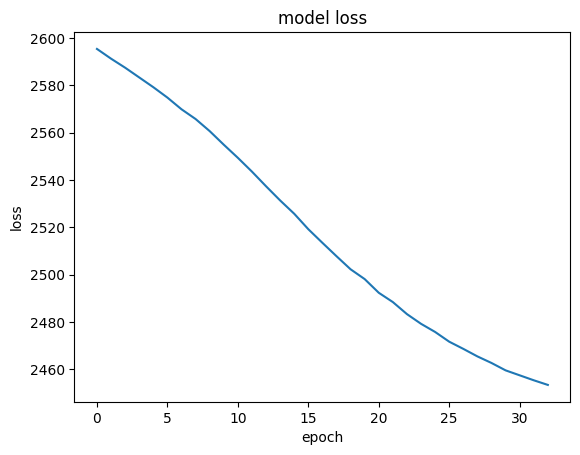

In [65]:
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()